In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
my_conn=sqlite3.connect('./data.db')


In [3]:
df_artists = pd.read_sql_query('SELECT * FROM artist',con=my_conn)

df_artists.head()

,artist_id,artist_name
0,0,Norah Jones
1,1,Deep Purple
2,2,Gorillaz
3,3,Foo Fighters
4,4,Bruce Springsteen


In [4]:
df_songs = pd.read_sql_query('SELECT * FROM songs',con=my_conn)
df_songs.head()

,song_id,title,year,artist_id,genre_id
0,0,Sunrise,2004,0,0
1,33,Don't Know Why,2002,0,0
2,10,Love Me Tender,2002,10,0
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0
4,387,(You're The) Devil in Disguise,2002,10,0


In [5]:
df_song_characteristics = pd.read_sql_query('SELECT * FROM characteristics',con=my_conn)
df_song_characteristics.head()

,song_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,157,30,53,-14,11,68,201,94,3,71
1,1,135,79,50,-11,17,81,207,17,7,39
2,2,168,69,66,-9,7,52,341,2,17,69
3,3,173,96,43,-4,3,37,269,0,4,76
4,4,106,82,58,-5,10,87,256,1,3,59


In [6]:
df_genres = pd.read_sql_query('SELECT * FROM genres',con=my_conn)
df_genres.head()

,genre_id,genre_name
0,0,adult standards
1,1,album rock
2,2,alternative hip hop
3,3,alternative metal
4,4,classic rock


In [7]:
df=df_songs.merge(df_song_characteristics).merge(df_genres).merge(df_artists).reset_index()
df.drop(columns=['artist_id','genre_id'],inplace=True)
df.head()

,index,song_id,title,year,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,genre_name,artist_name
0,0,0,Sunrise,2004,157,30,53,-14,11,68,201,94,3,71,adult standards,Norah Jones
1,1,33,Don't Know Why,2002,88,20,73,-12,7,62,186,88,3,74,adult standards,Norah Jones
2,2,10,Love Me Tender,2002,109,5,44,-16,11,31,162,88,4,49,adult standards,Elvis Presley
3,3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,115,97,60,-6,13,72,212,0,5,64,adult standards,Elvis Presley
4,4,387,(You're The) Devil in Disguise,2002,123,73,48,-8,11,87,140,57,17,65,adult standards,Elvis Presley


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1994 non-null   int64 
 1   song_id       1994 non-null   int64 
 2   title         1994 non-null   object
 3   year          1994 non-null   int64 
 4   bpm           1994 non-null   int64 
 5   energy        1994 non-null   int64 
 6   danceability  1994 non-null   int64 
 7   db            1994 non-null   int64 
 8   liveness      1994 non-null   int64 
 9   valence       1994 non-null   int64 
 10  length        1994 non-null   int64 
 11  acousticness  1994 non-null   int64 
 12  speechiness   1994 non-null   int64 
 13  popularity    1994 non-null   int64 
 14  genre_name    1994 non-null   object
 15  artist_name   1994 non-null   object
dtypes: int64(13), object(3)
memory usage: 249.4+ KB


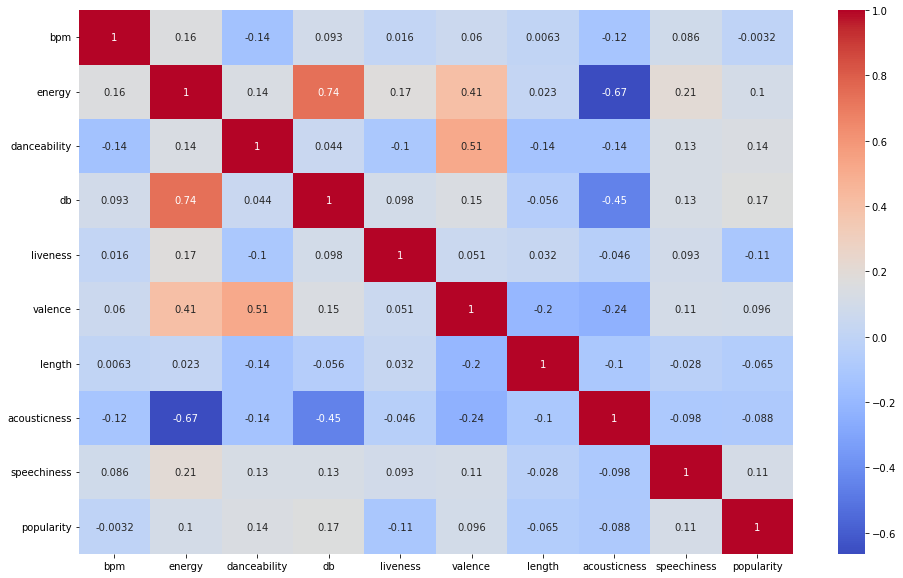

In [213]:
plt.figure(figsize = (16,10))
df_heatmap=df_song_characteristics.drop(columns=['song_id']).corr()
sns.heatmap(df_heatmap,cmap='coolwarm',annot=True)
plt.title='Correlation between different song characteristics'
plt.show()

In [120]:
df_most_popular_bpm=df.groupby(['bpm'])[['index']].count().sort_values(by='index',ascending=False).reset_index()
df_most_popular_bpm.columns=['bpm','count']
df_most_popular_bpm


,bpm,count
0,125,40
1,127,39
2,120,38
3,123,38
4,115,36
...,...,...
140,63,1
141,60,1
142,58,1
143,54,1


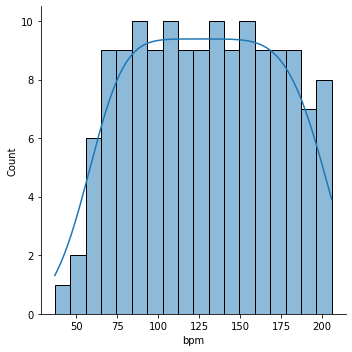

In [138]:

sns.displot(df_most_popular_bpm,x='bpm',bins=18,kde=True)

In [148]:
df_top5_avg_length=df.groupby(['genre_name'])[['length']].mean().sort_values(by='length',ascending=False).head().reset_index()
df_top5_avg_length

,genre_name,length
0,finnish metal,444.500000
1,italian pop,391.000000
2,contemporary vocal jazz,384.000000
3,chamber pop,374.000000
4,funk,353.384615


<AxesSubplot:xlabel='genre_name', ylabel='length'>

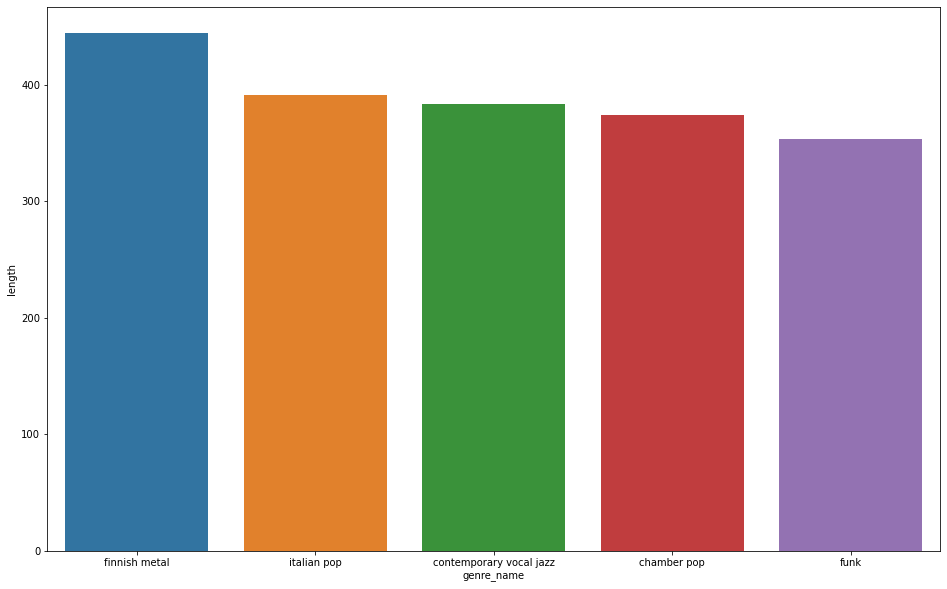

In [150]:
plt.figure(figsize = (16,10))
sns.barplot(data=df_top5_avg_length,y='length',x='genre_name')

<Figure size 1440x1440 with 0 Axes>

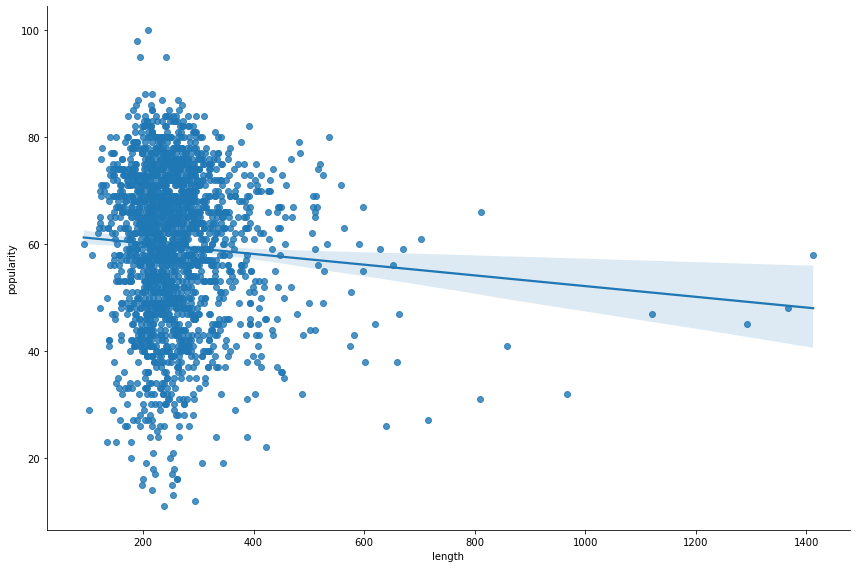

In [211]:
plt.figure(figsize = (20,20))
sns.lmplot(data=df,x='length',y='popularity',height=8, aspect=1.5)

In [236]:
df_top_avg_bpm_genres=df.groupby(['genre_name'])[['bpm']].mean().sort_values(by='bpm').tail(5).reset_index()
df_top_avg_bpm_genres


,genre_name,bpm
0,bebop,174.0
1,latin alternative,176.0
2,latin,178.5
3,electro house,180.0
4,laboratorio,189.0


<AxesSubplot:xlabel='genre_name', ylabel='bpm'>

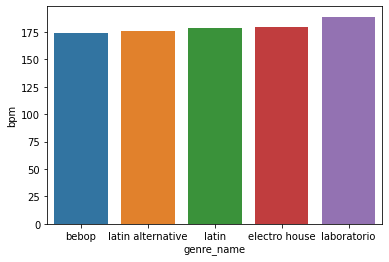

In [238]:
sns.barplot(data=df_top_avg_bpm_genres,x='genre_name',y='bpm')

In [249]:
df_avg_energy=df.groupby(['year'])[['energy','bpm']].mean()
df_avg_energy


,energy,bpm
year,,
1956,66.000000,95.000000
1958,37.200000,144.600000
1959,52.000000,158.333333
1960,35.000000,87.000000
1961,29.000000,100.000000
...,...,...
2015,62.000000,121.880952
2016,52.742857,121.285714
2017,63.333333,118.777778


<AxesSubplot:xlabel='year'>

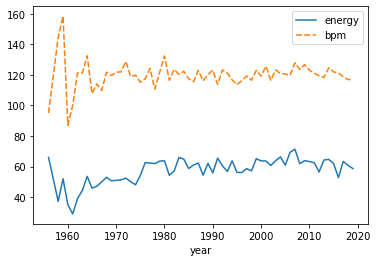

In [250]:
sns.lineplot(data=df_avg_energy,y)